<div style =   "color           : white  ;
                display         : flex   ;
                align-items     : center ;
                justify-content : center ;
                border-radius   : 5px    ;
                background-color: #141f1f;
                font-size       : 200%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 20px;
            margin : auto;
            color  : white"    >
Earthquake damage Preprocessing
</p>
</div>



<img src="../docs/images/R.jfif" alt="Alt Text" width="100%" height="400px">


<div style="color: white;
            display: fill;
            border-radius: 5px;
            background-color: #283e3e;
            font-family: Verdana;
            letter-spacing: 0.5px;
            font-size: 150%;">
    <p style="padding: 30px;
              color: white;">
        <span style="color: black; font-size: 125%; font-weight: bold;">Author:</span> Ezzat Hegazy<br>
        <span style="color: black; font-size: 125%; font-weight: bold;">Versions:</span><br>
        ----------- <br>
        26 October, 2023: Preprocessing <br>
        27 October, 2023: EDA <br>
        1 December, 2023: Model <br>
        8 December, 2023: Deployment <br>
    </p>
</div>


<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 100%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style="padding:15px;color:white;"> 
    Link to the raw dataset on kaggle:<br> 
    <a href="https://www.kaggle.com/datasets/arashnic/earthquake-magnitude-damage-and-impact/data">
    https://www.kaggle.com/datasets/arashnic/earthquake-magnitude-damage-and-impact/data</a> <br>
</p> 
</div>

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Toolkit
</p>
</div>

In [1]:
import pandas as pd
import numpy as np 
import klib
from sklearn.impute import KNNImputer
from datasist.structdata import detect_outliers
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Import and Inspect data
</p>
</div>

In [2]:
pd.options.display.max_columns = None   # display all columns
df = pd.read_csv(r"../data/raw/csv_building_structure.csv")

df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [3]:
# random sample
df.sample(5)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
449438,282703002071,28,2804,280404,3,3,12,200,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Not used,Grade 4,Major repair
519699,300902090091,30,3007,300703,2,0,52,176,16,0,Flat,Cement-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
94547,204106001261,20,2005,200514,1,1,1,405,12,12,Flat,Bamboo/Timber,Bamboo/Timber-Heavy roof,Mud,Not applicable,Not attached,Rectangular,0,0,0,0,0,0,1,1,0,0,0,Not damaged,Grade 1,No need
570228,303508001341,30,3009,300902,3,3,20,300,22,22,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,1,0,0,0,0,Damaged-Not used,Grade 4,Reconstruction
243974,231406000851,23,2304,230405,2,0,35,218,14,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,1,1,0,0,0,0,1,0,0,0,0,Damaged-Rubble Clear-New building built,Grade 5,Reconstruction


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Preprocessing
</p>
</div>

In [5]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [6]:
# columns names seem to be well processed, we're just going to make sure
klib.clean_column_names(df).columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed'],
      dtype='object')

In [7]:
# duplicates
df.duplicated().sum()

0

In [8]:
# percentage of nulls
((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

technical_solution_proposed               0.001575
damage_grade                              0.001575
plan_configuration                        0.000131
position                                  0.000131
count_floors_pre_eq                       0.000000
has_superstructure_mud_mortar_stone       0.000000
vdcmun_id                                 0.000000
condition_post_eq                         0.000000
has_superstructure_other                  0.000000
has_superstructure_rc_engineered          0.000000
has_superstructure_rc_non_engineered      0.000000
has_superstructure_bamboo                 0.000000
has_superstructure_timber                 0.000000
has_superstructure_cement_mortar_brick    0.000000
has_superstructure_mud_mortar_brick       0.000000
has_superstructure_cement_mortar_stone    0.000000
has_superstructure_stone_flag             0.000000
has_superstructure_adobe_mud              0.000000
count_floors_post_eq                      0.000000
ward_id                        

In [9]:
# very low percentage so drop rows
df.dropna(axis=0, inplace=True)

((df.isna().sum()/df.shape[0])*100).sort_values(ascending=False)

building_id                               0.0
plan_configuration                        0.0
damage_grade                              0.0
condition_post_eq                         0.0
has_superstructure_other                  0.0
has_superstructure_rc_engineered          0.0
has_superstructure_rc_non_engineered      0.0
has_superstructure_bamboo                 0.0
has_superstructure_timber                 0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_stone_flag             0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_adobe_mud              0.0
position                                  0.0
district_id                               0.0
other_floor_type                          0.0
ground_floor_type                         0.0
roof_type                                 0.0
foundation_type                           0.0
land_surface_condition            

In [10]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [11]:
df = klib.data_cleaning(df)

Shape of cleaned data: (762094, 31) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 170.2 MB (-84.18%)



In [12]:
# data types
df = klib.convert_datatypes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762094 entries, 0 to 762093
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             762094 non-null  int64   
 1   district_id                             762094 non-null  int8    
 2   vdcmun_id                               762094 non-null  int16   
 3   ward_id                                 762094 non-null  int32   
 4   count_floors_pre_eq                     762094 non-null  int8    
 5   count_floors_post_eq                    762094 non-null  int8    
 6   age_building                            762094 non-null  int16   
 7   plinth_area_sq_ft                       762094 non-null  int16   
 8   height_ft_pre_eq                        762094 non-null  int8    
 9   height_ft_post_eq                       762094 non-null  int8    
 10  land_surface_condition          

In [13]:
df.sample(5)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
303483,236709000381,23,2310,231006,2,0,16,370,24,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,1,0,0,0,1,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
222950,224804000611,22,2206,220609,2,2,7,375,12,12,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,1,0,0,0,0,Damaged-Not used,Grade 4,Reconstruction
274650,234109000251,23,2311,231108,2,0,4,337,14,0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear,Grade 5,Reconstruction
191953,222107001081,22,2209,220903,3,0,7,304,21,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear,Grade 5,Reconstruction
567013,303502003781,30,3009,300904,1,1,5,800,10,10,Moderate slope,RC,RCC/RB/RBC,Brick/Stone,Not applicable,Attached-1 side,Rectangular,0,0,0,0,0,0,0,0,0,1,0,Not damaged,Grade 1,Minor repair


<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Deep analytics
</p>
</div>

In [14]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include=['O', 'category'])

print(num_cols.columns)
print(cat_cols.columns)

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other'],
      dtype='object')
Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'condition_post_eq', 'damage_grade',
       'technical_solution_proposed'],
      dtype='object')


In [15]:
len(num_cols.columns) + len(cat_cols.columns)

31

In [16]:
for feature in cat_cols:
    print(f"________________________{feature}________________________")
    print(df[feature].value_counts())

________________________land_surface_condition________________________
land_surface_condition
Flat              631663
Moderate slope    105640
Steep slope        24791
Name: count, dtype: int64
________________________foundation_type________________________
foundation_type
Mud mortar-Stone/Brick    628705
Bamboo/Timber              57472
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: count, dtype: int64
________________________roof_type________________________
roof_type
Bamboo/Timber-Light roof    503736
Bamboo/Timber-Heavy roof    213774
RCC/RB/RBC                   44584
Name: count, dtype: int64
________________________ground_floor_type________________________
ground_floor_type
Mud            618205
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: count, dtype: int64
________________________other_floor_type________________________
other_floor_type
TImber/Bamboo-Mud    486907
Timbe

`In 'roof_type' Other is considered as null`

In [17]:
indices = df[df['foundation_type'] == 'Other'].index.to_list()
len(indices)

4552

We can either drop them, or impute by mode and that's what we're going for

In [21]:
df['foundation_type'] = df['foundation_type'].apply(lambda x: df['foundation_type'].mode()[0] if x == 'Other' else x)
df['foundation_type'].value_counts()

foundation_type
Mud mortar-Stone/Brick    633257
Bamboo/Timber              57472
Cement-Stone/Brick         39245
RC                         32120
Name: count, dtype: int64

`In 'ground_floor_type' Other is considered as null`

In [22]:
df['ground_floor_type'] = df['ground_floor_type'].apply(lambda x: df['ground_floor_type'].mode()[0] if x == 'Other' else x)
df['ground_floor_type'].value_counts()

ground_floor_type
Mud            619258
RC              73149
Brick/Stone     66093
Timber           3594
Name: count, dtype: int64

`In 'plan_configuration' Others is considered as null`

In [23]:
df['plan_configuration'] = df['plan_configuration'].apply(lambda x: df['plan_configuration'].mode()[0] if x == 'Others' else x)
df['plan_configuration'].value_counts()

plan_configuration
Rectangular                        731764
Square                              17576
L-shape                             10079
T-shape                               969
Multi-projected                       940
U-shape                               448
E-shape                               140
Building with Central Courtyard        98
H-shape                                80
Name: count, dtype: int64

In [24]:
df.isna().sum().sort_values(ascending=False)

building_id                               0
plan_configuration                        0
damage_grade                              0
condition_post_eq                         0
has_superstructure_other                  0
has_superstructure_rc_engineered          0
has_superstructure_rc_non_engineered      0
has_superstructure_bamboo                 0
has_superstructure_timber                 0
has_superstructure_cement_mortar_brick    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_stone    0
has_superstructure_stone_flag             0
has_superstructure_mud_mortar_stone       0
has_superstructure_adobe_mud              0
position                                  0
district_id                               0
other_floor_type                          0
ground_floor_type                         0
roof_type                                 0
foundation_type                           0
land_surface_condition                    0
height_ft_post_eq               

In [25]:
# deep analytics for numerics
df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
count,7.620940e+05,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000
mean,2.607522e+11,25.767912,2582.695976,258275.039247,2.087787,1.252050,24.325031,406.673668,16.049424,9.868785,0.042402,0.800269,0.035122,0.015816,0.022962,0.071527,0.258770,0.080484,0.039794,0.016386,0.012026
std,5.801868e+10,5.807569,581.174161,58117.487798,0.655104,1.063278,65.034555,226.780437,5.493900,8.574218,0.201504,0.399799,0.184087,0.124762,0.149782,0.257703,0.437959,0.272040,0.195476,0.126956,0.109002
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Feature Engineering
</p>
</div>

In [26]:
# add new features from existing ones
df['lost_floors'] = df['count_floors_pre_eq'] - df['count_floors_post_eq']
df['lost_height'] = df['height_ft_pre_eq'] - df['height_ft_post_eq']

df.sample(5)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,lost_floors,lost_height
172997,220406015031,22,2202,220205,2,0,23,286,12,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble unclear,Grade 5,Reconstruction,2,12
385573,246504003491,24,2410,241004,1,1,5,642,7,7,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,Not applicable,Attached-1 side,Rectangular,0,0,0,0,1,0,0,0,0,0,0,Damaged-Used in risk,Grade 4,Reconstruction,0,0
696084,361201001241,36,3610,361007,2,2,34,294,14,14,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Brick/Stone,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,1,0,0,0,0,Damaged-Not used,Grade 4,Reconstruction,0,0
305890,237001000331,23,2313,231306,2,1,8,640,12,6,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,Timber-Planck,Attached-1 side,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Not used,Grade 4,Reconstruction,1,6
70100,202506070822,20,2005,200506,2,2,8,400,24,24,Flat,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-1 side,Rectangular,0,0,0,0,0,0,0,0,0,1,0,Damaged-Repaired and used,Grade 2,Minor repair,0,0


In [27]:
df.describe()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,lost_floors,lost_height
count,7.620940e+05,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000,762094.000000
mean,2.607522e+11,25.767912,2582.695976,258275.039247,2.087787,1.252050,24.325031,406.673668,16.049424,9.868785,0.042402,0.800269,0.035122,0.015816,0.022962,0.071527,0.258770,0.080484,0.039794,0.016386,0.012026,0.835737,6.180639
std,5.801868e+10,5.807569,581.174161,58117.487798,0.655104,1.063278,65.034555,226.780437,5.493900,8.574218,0.201504,0.399799,0.184087,0.124762,0.149782,0.257703,0.437959,0.272040,0.195476,0.126956,0.109002,1.091795,8.266952
min,1.201010e+11,12.000000,1201.000000,120101.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,-80.000000
25%,2.219090e+11,22.000000,2204.000000,220402.000000,2.000000,0.000000,9.000000,280.000000,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.463020e+11,24.000000,2410.000000,241004.000000,2.000000,1.000000,16.000000,358.000000,16.000000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.036080e+11,30.000000,3010.000000,301006.000000,2.000000,2.000000,27.000000,470.000000,18.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000
max,3.667090e+11,36.000000,3611.000000,361108.000000,9.000000,9.000000,999.000000,5000.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,99.000000


From here it turns out that there're some records that have pre (floors or height) more than post, which doesn't make sense!! 

`So replace with nan, then impute using KNNImputer.`

In [28]:
df[(df['count_floors_post_eq'] > df['count_floors_pre_eq']) | (df['height_ft_post_eq'] > df['height_ft_pre_eq'])]

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,lost_floors,lost_height
729,120201000042,12,1205,120502,2,2,45,400,14,17,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,Grade 3,Major repair,0,-3
732,120201000071,12,1205,120502,2,2,28,459,14,17,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Major repair,0,-3
736,120201000101,12,1205,120502,2,2,3,378,14,17,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 3,Major repair,0,-3
764,120201000341,12,1205,120502,2,2,20,448,14,17,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 3,Major repair,0,-3
926,120203000291,12,1205,120502,2,2,19,360,14,17,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Not used,Grade 4,Reconstruction,0,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759711,366507000491,36,3601,360103,2,3,3,810,27,27,Flat,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Not attached,Rectangular,0,0,0,0,0,0,0,0,0,1,0,Not damaged,Grade 1,No need,-1,0
760525,366608000531,36,3606,360603,1,1,4,400,10,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Not applicable,Not attached,Square,0,1,0,0,0,0,0,0,0,0,0,Damaged-Not used,Grade 3,Major repair,0,-8
761084,366704000431,36,3603,360301,1,2,1,576,10,20,Flat,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Not attached,Square,0,0,0,0,0,1,0,0,1,0,0,Not damaged,Grade 1,No need,-1,-10
761992,366709000301,36,3603,360302,2,2,40,864,20,28,Flat,Cement-Stone/Brick,RCC/RB/RBC,RC,RCC/RB/RBC,Not attached,Rectangular,0,0,0,1,0,0,0,0,0,0,0,Damaged-Not used,Grade 4,Reconstruction,0,-8


In [29]:
condition = df['count_floors_post_eq'] > df['count_floors_pre_eq']
df.loc[condition, ['count_floors_post_eq', 'count_floors_pre_eq']] = np.nan

In [30]:
condition = df['height_ft_post_eq'] > df['height_ft_pre_eq']
df.loc[condition, ['height_ft_post_eq', 'height_ft_pre_eq']] = np.nan

In [31]:
len(df[df['count_floors_post_eq'] > df['count_floors_pre_eq']])

0

In [32]:
len(df[df['height_ft_post_eq'] > df['height_ft_pre_eq']])

0

In [33]:
num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include=['O', 'category'])

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform
df_num_imputed = pd.DataFrame(imputer.fit_transform(num_cols), columns=num_cols.columns)
df = pd.concat([df_num_imputed, cat_cols], axis=1)
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,lost_floors,lost_height,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed
0,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,9.0,288.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3,Major repair
1,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,15.0,364.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5,Reconstruction
2,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,384.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair
3,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,312.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair
4,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,30.0,308.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1,Minor repair


In [34]:
len(df[df['count_floors_post_eq'] > df['count_floors_pre_eq']])

0

In [35]:
len(df[df['height_ft_post_eq'] > df['height_ft_pre_eq']])

0

In [36]:
# recompute
df['lost_floors'] = df['count_floors_pre_eq'] - df['count_floors_post_eq']
df['lost_height'] = df['height_ft_pre_eq'] - df['height_ft_post_eq']

df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,lost_floors,lost_height,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed
0,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,9.0,288.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3,Major repair
1,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,15.0,364.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5,Reconstruction
2,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,384.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair
3,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,20.0,312.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair
4,1.201010e+11,12.0,1207.0,120703.0,1.0,1.0,30.0,308.0,9.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1,Minor repair


<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Outliers
</p>
</div>

In [37]:
# select numerical cols only
num_cols = df.select_dtypes(include='number')
# filter to exclude cols that start with 'has' as they're considered to be categorical
filtered_columns = [col for col in num_cols.columns if not col.startswith('has')]
boxplots = df[filtered_columns]

In [38]:
indices = detect_outliers(df, 0, [filtered_columns])

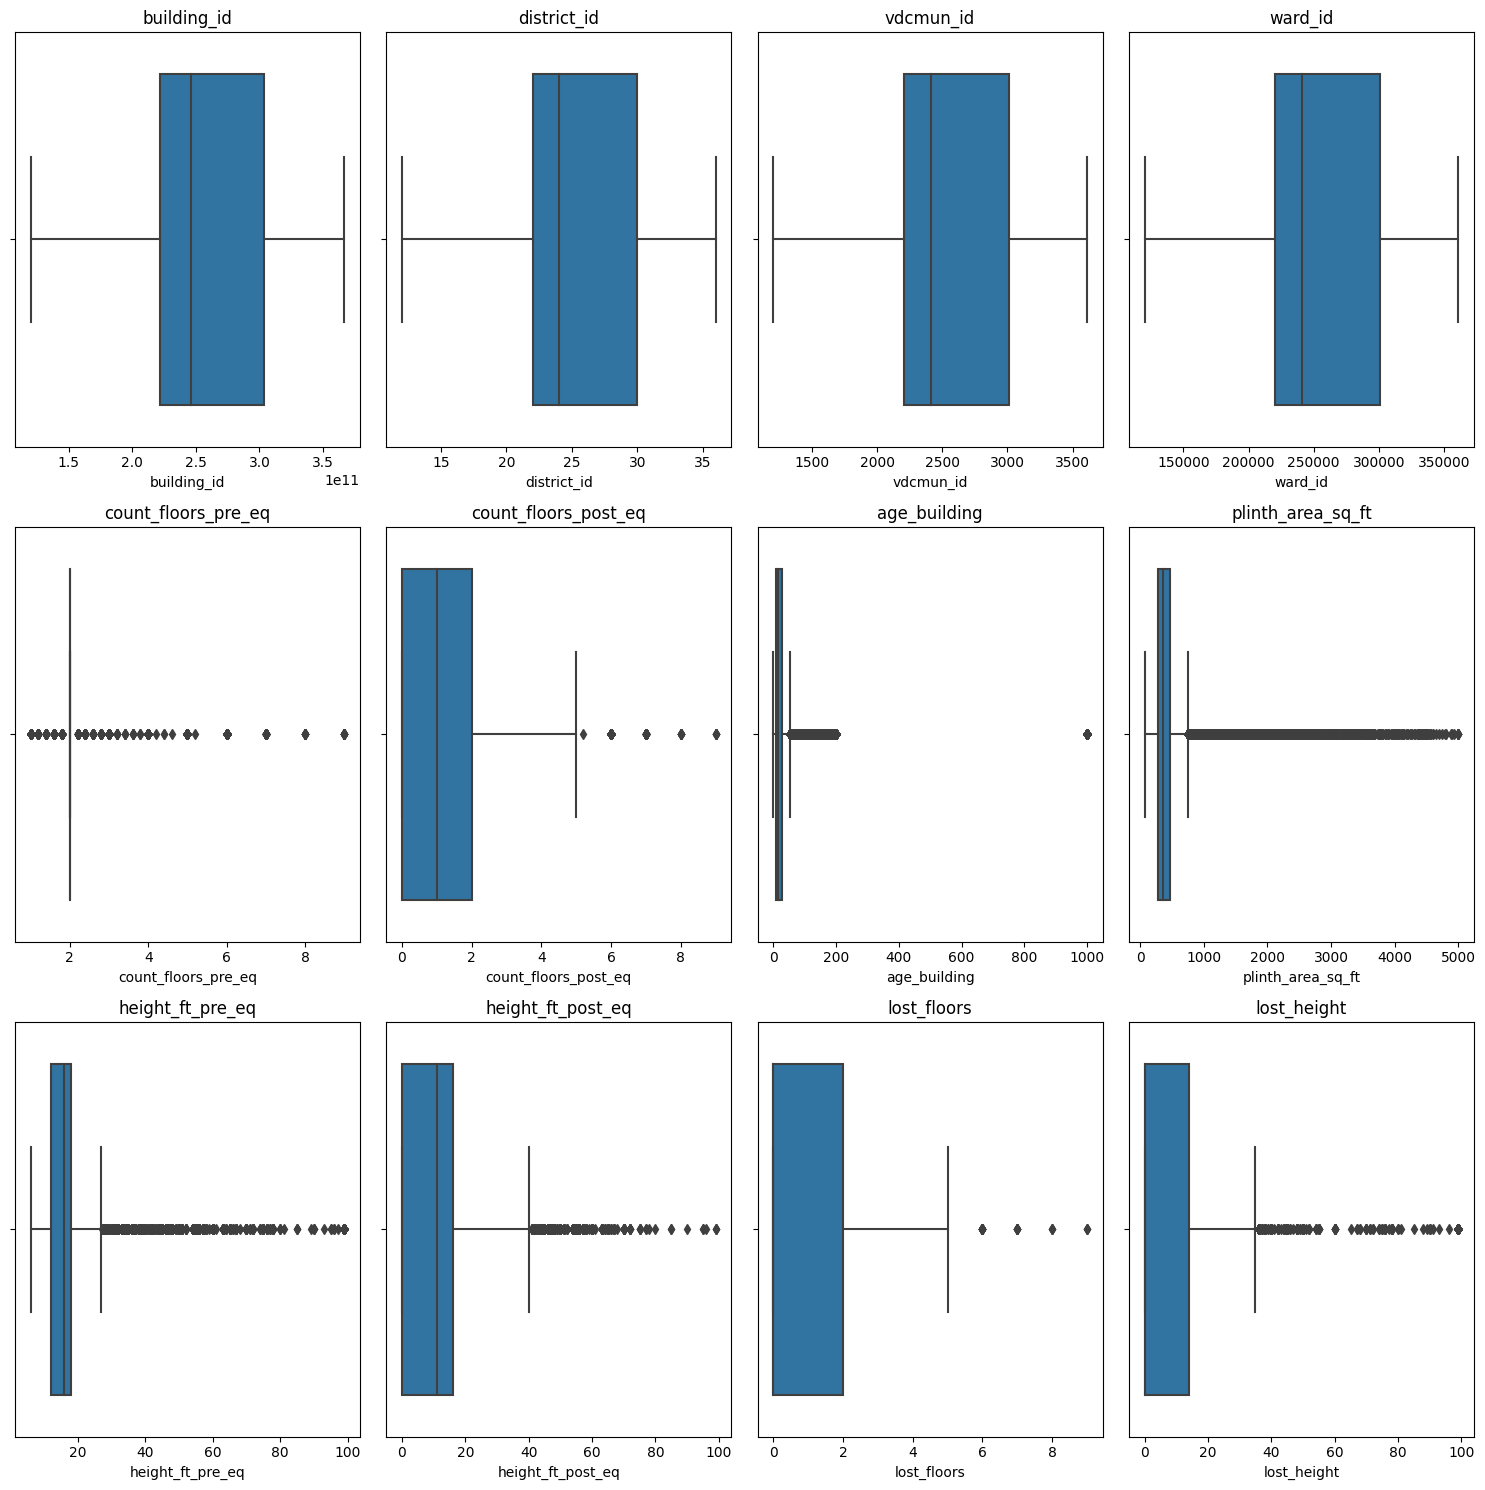

In [271]:
# Set up the matplotlib figure with subplots
num_cols = len(boxplots.columns)
cols_per_row = 4
num_rows = (num_cols - 1) // cols_per_row + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 5 * num_rows))

# Loop through each column and create a boxplot
for i, column in enumerate(boxplots.columns):
    row_idx = i // cols_per_row
    col_idx = i % cols_per_row
    sns.boxplot(x=boxplots[column], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(column)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# SAVE DATA
df.to_csv("../data/processed/cleaned_data.csv", index=False)